In [216]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

data = np.load("/Users/miles.woollacott/Desktop/Other Sciency Stuff/CDRH3_padded_Nussenzweig_with25sites.csv_rFon1D.npy")

In [194]:
data_flat = data.flatten()

In [205]:
data_null = np.where(data_flat==0, float('nan'), data_flat)
data_nuller = np.where(data_flat>250, float('nan'), np.where(data_flat<-500, float('nan'), data_flat))
data_nullest = np.where(data_nuller==0, float('nan'), data_nuller)

525


In [477]:
dm = 21
sites = 25
num_dm = np.arange(dm)
ind = np.arange(sites)
width = 1/(sites+1)

s = sites*dm

# some_dim = [data_array_flat[i], i for i in range(0, 160, 4)]
dim = dict()
for i in num_dm:
    dim[i] = [data_nullest[i] for i in range(i, s, dm)]  # y-axis for 0 dim

dim_num = dict()
for i in ind:
    dim_num[i] = [data_nullest[i] for i in range(i, s, sites)]
    
sums = list()

#Sum of na values per row
for i in ind:
    sums.append(sum(np.isnan(list(dim_num[i]))))

dim_na = dict()
dim_loc = dict()
for i in ind:
    dim_na[i] = np.array(dim_num[i])[np.array(np.isnan(dim_num[i]))==False]
    dim_loc[i] = np.arange(len(dim_num[i]))[np.array(np.isnan(dim_num[i]))==False]
    
colors = [
        "tab:blue",
        "blueviolet",
        "saddlebrown",
        "tab:orange",
        "tab:green",
        "mediumvioletred",
        "coral",
        "tab:red",
        "tab:purple",
        "dodgerblue",
        "tab:brown",
        "gold",
        "tab:pink",
        "limegreen",
        "tab:gray",
        "chocolate",
        "tab:olive",
        "mediumvioletred",
        "goldenrod",
        "tab:cyan",
        "violet"
    ]
col_len = len(colors)
alpb = ['A','R','N','D','C','E','Q','G','H','I','L','K','M','F','P','S','T','W','Y','V','n']
alpb_d = dict()
for i in num_dm:
    alpb_d[i] = colors[i%col_len]
    alpb_d[alpb[i]] = alpb_d.pop(i)

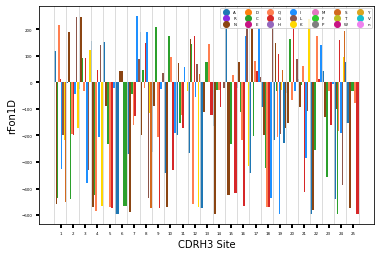

In [478]:
fig, ax = plt.subplots()



pi = dict()
for i in ind:
    ln = 1/len(dim_na[i])
    rn = np.arange(1/ln)
    pi[i] = ax.bar(x=i+np.array([j for j in rn])*ln, height=[j for j in dim_na[i]], width=ln, align="edge", color=[colors[i%col_len] for i in list(dim_loc[0])])

ax.set_xticks(ind + width+0.5)
ax.set_xticklabels(np.arange(1, sites+1))

for i in range(sites+1):
    ax.axvline(i, color="#D4D4D4", linewidth=0.8)
    
color_map = [color for color in list(alpb_d.values())]
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in alpb_d.values()]

ax.legend(markers, alpb_d.keys(), loc=0, ncol=7, prop={'size':4})
ax.tick_params(width = 2, labelsize = 4) #width of the tick and the size of the tick labels
plt.xlabel('CDRH3 Site')
plt.ylabel('rFon1D')
#Regressions of off values onto each site of target RNA (orthogonalized within)
#plt.savefig('rFon1D_off_star.png', bbox_inches='tight')
figure = ax.get_figure()    
figure.savefig('moresanergraph.png', dpi=400)